In [1]:
from textblob import TextBlob
import sys
import tweepy as tw
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import emoji
import gensim
nltk.download('stopwords')
nltk.download('wordnet')
stemmer = SnowballStemmer(language='english')
WNLemmatizer = nltk.WordNetLemmatizer()
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\minha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Authentication
consumerKey = "6UkdKLghQ2tmKRIhuv4OIXedU"
consumerSecret = "gbtOPrY9yFV1M9cCXcNoHjKAeu4nskFdYHL76m8zyl2ltmozI8"
accessToken = "1351939444157394945-6Zu9vFKS7WpD4ZrbnyoP65cru0Laao"
accessTokenSecret = "YicYkwsovse2V8fqc0g1B22I4ZOsIQPZiozvwHPFgEqXz"
auth = tw.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
# Create the API object passing the auth object
api = tw.API(auth, wait_on_rate_limit=True)

In [3]:
#Bell Twitter Data
input_user_id = r'Bell_Support'
max_fetch = 5000
# Function to fetch tweets
tweets_list = []
def fetch_tweet(username,count):
    
    columns = ['username','created_at',
                  'tweet']
    try:     
        print('Tweets scraping from', username,'account..')
        tweets =tw.Cursor(api.user_timeline,id=username, tweet_mode='extended').items(count)

        tweets_list = [[tweet.user.screen_name,
                        tweet.created_at, tweet.full_text
                        ] for tweet in tweets]
        
        print('Total tweets fetched:',len(tweets_list))
        
        
    except BaseException as e:
          print('failed to fetch tweets, on_status,',str(e))
    
    bell_tweets = pd.DataFrame(tweets_list, columns=columns)
    print('DataFrame shape:',bell_tweets.shape)

    return bell_tweets
# fetching tweets into a dataframe
bell_tweets = fetch_tweet(input_user_id,max_fetch)
bell_tweets.sample(5)


Unexpected parameter: id


Tweets scraping from Bell_Support account..


Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


Total tweets fetched: 3250
DataFrame shape: (3250, 3)


,username,created_at,tweet
961,Bell_Support,2021-11-05 16:57:29+00:00,@bigcjat It is an unlimited plan and the redu...
2829,Bell_Support,2021-08-04 16:35:31+00:00,@peterfromottawa We are sorry to hear that you...
3162,Bell_Support,2021-07-17 18:07:06+00:00,@northernck We appreciate the update. If you d...
2418,Bell_Support,2021-08-31 20:17:03+00:00,@kweenshaker Welcome to Bell! Please be sure t...
1650,Bell_Support,2021-10-04 18:20:26+00:00,@jennv04 We are sorry to hear that you are hav...


In [4]:
#Rogers Twitter Data
input_user_id = r'RogersHelps'
max_fetch = 5000
# Function to fetch tweets
tweets_list = []
def fetch_tweet(username,count):
    
    columns = ['username','created_at',
                  'tweet']
    try:     
        print('Tweets scraping from', username,'account..')
        tweets =tw.Cursor(api.user_timeline,id=username, tweet_mode='extended').items(count)

        tweets_list = [[tweet.user.screen_name,
                        tweet.created_at, tweet.full_text
                        ] for tweet in tweets]
        
        print('Total tweets fetched:',len(tweets_list))
        
        
    except BaseException as e:
          print('failed to fetch tweets, on_status,',str(e))
    
    rogers_tweet = pd.DataFrame(tweets_list, columns=columns)
    print('DataFrame shape:',rogers_tweet.shape)

    return rogers_tweet
# fetching tweets into a dataframe
rogers_tweet = fetch_tweet(input_user_id,max_fetch)
rogers_tweet.sample(5)

Unexpected parameter: id


Tweets scraping from RogersHelps account..


Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


Total tweets fetched: 3250
DataFrame shape: (3250, 3)


,username,created_at,tweet
2522,RogersHelps,2021-10-22 03:58:11+00:00,"@Jonatho22254010 Don't be sorry, it's all good..."
2899,RogersHelps,2021-10-15 00:19:19+00:00,@WagerdYou It's definitely something we want t...
487,RogersHelps,2021-12-04 01:53:41+00:00,@Palpatine_Phil Not a problem! Have a good one...
2035,RogersHelps,2021-11-02 02:01:19+00:00,@Mirza_Jatt_HR08 Staying connected on the road...
1179,RogersHelps,2021-11-19 02:06:45+00:00,"@acres_thompson Hi Thompson, it's unfortunate ..."


In [5]:
#Telus Twitter Data
input_user_id = r'TELUSsupport'
max_fetch = 5000
# Function to fetch tweets
tweets_list = []
def fetch_tweet(username,count):
    
    columns = ['username','created_at',
                  'tweet']
    try:     
        print('Tweets scraping from', username,'account..')
        tweets =tw.Cursor(api.user_timeline,id=username, tweet_mode='extended').items(count)

        tweets_list = [[tweet.user.screen_name,
                        tweet.created_at, tweet.full_text
                        ] for tweet in tweets]
        
        print('Total tweets fetched:',len(tweets_list))
        
        
    except BaseException as e:
          print('failed to fetch tweets, on_status,',str(e))
    
    telus_tweets = pd.DataFrame(tweets_list, columns=columns)
    print('DataFrame shape:',telus_tweets.shape)

    return telus_tweets
# fetching tweets into a dataframe
telus_tweets = fetch_tweet(input_user_id,max_fetch)
telus_tweets.sample(5)

Unexpected parameter: id


Tweets scraping from TELUSsupport account..


Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


Total tweets fetched: 3250
DataFrame shape: (3250, 3)


,username,created_at,tweet
1119,TELUSsupport,2021-10-29 15:54:16+00:00,@RashidJamaal Hi Jamal! Are you still having i...
684,TELUSsupport,2021-11-16 09:01:23+00:00,"@OpheliaBulgaria Hi there, Ophelia. We're sorr..."
3140,TELUSsupport,2021-08-23 19:16:02+00:00,@BradyTom89 Hi Brady! We're sorry to hear that...
1686,TELUSsupport,2021-10-08 14:30:23+00:00,"@doug_hallett Hi there, If you are wanting to ..."
1655,TELUSsupport,2021-10-10 15:54:17+00:00,@DarrahBrian Hello Brian! We'll be happy to as...


In [6]:
#Freedom Twitter Data
input_user_id = r'freedomsupport'
max_fetch = 5000
# Function to fetch tweets
tweets_list = []
def fetch_tweet(username,count):
    
    columns = ['username','created_at',
                  'tweet']
    try:     
        print('Tweets scraping from', username,'account..')
        tweets =tw.Cursor(api.user_timeline,id=username, tweet_mode='extended').items(count)

        tweets_list = [[tweet.user.screen_name,
                        tweet.created_at, tweet.full_text
                        ] for tweet in tweets]
        
        print('Total tweets fetched:',len(tweets_list))
        
        
    except BaseException as e:
          print('failed to fetch tweets, on_status,',str(e))
    
    freedom = pd.DataFrame(tweets_list, columns=columns)
    print('DataFrame shape:',freedom.shape)

    return freedom

# fetching tweets into a dataframe
freedom = fetch_tweet(input_user_id,max_fetch)
freedom.sample(5)


Unexpected parameter: id


Tweets scraping from freedomsupport account..


Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


Total tweets fetched: 3250
DataFrame shape: (3250, 3)


,username,created_at,tweet
2874,freedomsupport,2021-05-02 14:36:50+00:00,"@EllEmmMay Hi there, thank you for reaching ou..."
2039,freedomsupport,2021-07-20 02:01:38+00:00,"@dwolder Hey there, thanks for taking the time..."
3041,freedomsupport,2021-04-19 16:02:40+00:00,"@af__michael Hey Michael, if you're having som..."
444,freedomsupport,2021-11-13 06:00:34+00:00,We're signing off until 6 AM PST. Goodnight ev...
2292,freedomsupport,2021-06-22 21:15:00+00:00,#FreedomTip: Is it time for a new phone? Check...


In [7]:
bigdata = pd.concat([bell_tweets,rogers_tweet,telus_tweets,freedom], ignore_index=True, sort=False)

In [8]:
bigdata

,username,created_at,tweet
0,Bell_Support,2021-12-13 01:31:20+00:00,@cassimbas Hello there. We are sorry to know t...
1,Bell_Support,2021-12-12 23:45:13+00:00,@dogsareluv We're sorry to know you're having ...
2,Bell_Support,2021-12-12 23:41:27+00:00,@burlingtondude We're sorry to learn about thi...
3,Bell_Support,2021-12-12 22:51:37+00:00,"@blairs1 Thank you for your interest, we would..."
4,Bell_Support,2021-12-12 21:57:53+00:00,@2002Bourgogne We're sorry to know you're havi...
...,...,...,...
12995,freedomsupport,2021-03-27 16:54:03+00:00,"@franciscabyc Wow, this is beautiful! 😮🧡 -K.T"
12996,freedomsupport,2021-03-27 16:34:16+00:00,@mmcksmith We'll need to verify you and look i...
12997,freedomsupport,2021-03-27 16:13:11+00:00,"@mmcksmith Hi Megan, we'd definitely like to l..."
12998,freedomsupport,2021-03-27 15:38:55+00:00,"@ganjaginga Hi, we'd definitely like to look l..."


In [9]:
#Saving data in csv files
bell_tweets.to_csv('bell_twitterdata.csv', encoding='utf-8', index=False)
rogers_tweet.to_csv('rogers_twitterdata.csv', encoding='utf-8', index=False)
telus_tweets.to_csv('telus_twiiterdata.csv', encoding='utf-8', index=False)
freedom.to_csv('freedom_twitterdata.csv', encoding='utf-8', index=False)
bigdata.to_csv('All_network_data.csv', encoding='utf-8', index=False)

## Using Traditional Algorithims

## All Mobile Network

In [10]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt)
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'RT : ','',txt)
    txt = re.sub(r'https?\/\/[A-Za-z0-9\/]+','',txt)
    return txt
bigdata['Tweet_pre_processed']= bigdata['tweet'].apply(cleanUpTweet)
bigdata.sample(6)

,username,created_at,tweet,Tweet_pre_processed
5495,RogersHelps,2021-10-28 05:33:53+00:00,"@stickNblades Regrettably, due to policies, we...","Regrettably, due to policies, we're unable to..."
5037,RogersHelps,2021-11-06 18:28:05+00:00,@J_Anthony_22 Glad the game itself is not blac...,Glad the game itself is not blacked out for y...
11729,freedomsupport,2021-07-23 13:38:52+00:00,"@jaytheredneck1 Hi there Jay, we are always lo...","Hi there Jay, we are always looking to expand..."
6154,RogersHelps,2021-10-15 00:07:21+00:00,"@bonerinshorts Thanks for reaching out, Mike. ...","Thanks for reaching out, Mike. I certainly un..."
10890,freedomsupport,2021-09-25 13:04:55+00:00,"@kzarash Hi Arash, we are quite proud of our n...","Hi Arash, we are quite proud of our network a..."
12146,freedomsupport,2021-06-09 13:04:20+00:00,"@blackseasoul9 Hi there, thank you for reachin...","Hi there, thank you for reaching out to our t..."


In [11]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity
bigdata['Subjectivity']=bigdata['Tweet_pre_processed'].apply(getTextSubjectivity)
bigdata['Polarity']=bigdata['Tweet_pre_processed'].apply(getTextPolarity)
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    
    elif a==0:
        return "Neutral"
    else:
        return "Positive"
bigdata['Score']=bigdata['Polarity'].apply(getTextAnalysis)
bigdata.head(50)

,username,created_at,tweet,Tweet_pre_processed,Subjectivity,Polarity,Score
0,Bell_Support,2021-12-13 01:31:20+00:00,@cassimbas Hello there. We are sorry to know t...,Hello there. We are sorry to know that you're...,0.650000,0.250000,Positive
1,Bell_Support,2021-12-12 23:45:13+00:00,@dogsareluv We're sorry to know you're having ...,"We're sorry to know you're having issues, Col...",0.650000,0.250000,Positive
2,Bell_Support,2021-12-12 23:41:27+00:00,@burlingtondude We're sorry to learn about thi...,We're sorry to learn about this. We'd like to...,1.000000,-0.500000,Negative
3,Bell_Support,2021-12-12 22:51:37+00:00,"@blairs1 Thank you for your interest, we would...","Thank you for your interest, we would like to...",0.000000,0.000000,Neutral
4,Bell_Support,2021-12-12 21:57:53+00:00,@2002Bourgogne We're sorry to know you're havi...,"We're sorry to know you're having issues, Lis...",0.650000,0.250000,Positive
5,Bell_Support,2021-12-12 21:09:21+00:00,@AdabjitB We are sorry to hear that you are ha...,We are sorry to hear that you are having trou...,0.450000,-0.175000,Negative
6,Bell_Support,2021-12-12 20:45:38+00:00,@priprileigh We do recommend that you try rese...,We do recommend that you try resetting the eq...,1.000000,-0.500000,Negative
7,Bell_Support,2021-12-12 20:45:22+00:00,@priprileigh We are sorry to hear that you are...,We are sorry to hear that you are having trou...,0.390000,-0.090000,Negative
8,Bell_Support,2021-12-12 20:23:37+00:00,@eightdeck Thanks for reaching out @eightdeck!...,Thanks for reaching out ! We'd love to work w...,0.464732,0.283631,Positive
9,Bell_Support,2021-12-12 20:14:34+00:00,@CINNEYX Thanks! We will reply very soon. :),Thanks! We will reply very soon. :),0.500000,0.316667,Positive


In [59]:
bigdata.to_csv('All_network_data_score.csv', encoding='utf-8', index=False)

## Data Preparation

In [12]:
# Split the data
#train_set, test_set, y_train, y_test = train_test_split(df['Review'], df['Label'], test_size = 0.3, random_state=12)
train_set, test_set, y_train, y_test = train_test_split(bigdata['Tweet_pre_processed'], bigdata['Score'], test_size = 0.3, random_state=12)
# Transform Reviews text into a sparse matrix of n-gram counts by initiatlizing CountVectorizer
reviews_vector = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features=2000) # use top 2000 words only

# fit and transform the training_set
train_set_counts = reviews_vector.fit_transform(train_set)
# Check the shape of counts data
train_set_counts.shape


(9100, 2000)

In [13]:
# Convert raw frequency counts into TF-IDF values
reviews_tfidf = TfidfTransformer()
train_set_tfidf = reviews_tfidf.fit_transform(train_set_counts)
# Check the shape of tfidf data
train_set_tfidf.shape


(9100, 2000)

In [14]:
# Transform test data using fitted vectorizer and transformer
test_set_counts = reviews_vector.transform(test_set)
test_set_tfidf = reviews_tfidf.transform(test_set_counts)

In [15]:
# Scale train and test data
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
train_set_tfidf = scaler.fit_transform(train_set_tfidf)
test_set_tfidf = scaler.fit_transform(test_set_tfidf)

## **Model build**

#### **Logistic Regression**

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=2000)
lr.fit(train_set_tfidf, y_train)
# Predict the test reult and print accuracy
y_pred_lr = lr.predict(test_set_tfidf)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Linear Regression Accuracy : {}".format(accuracy))

Linear Regression Accuracy : 0.8953846153846153


#### **Random Forrest**

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0, max_features=2000)
rf.fit(train_set_tfidf, y_train)
# Predict the test reult and print accuracy
y_pred_rf = rf.predict(test_set_tfidf)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forrest Accuracy : {}".format(accuracy))

Random Forrest Accuracy : 0.6815384615384615


#### **Linear Support Vector Machine (SVM)**

In [18]:
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state=0, max_iter=2000)
svm.fit(train_set_tfidf, y_train)
# Predict the test reult and print accuracy
y_pred_svm = svm.predict(test_set_tfidf)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy : {}".format(accuracy))

Support Vector Machine Accuracy : 0.908974358974359


#### **Saving Models**

In [19]:
import pickle


classifier_saver = open('Logistic_regression.plk', 'wb')
pickle.dump(lr, classifier_saver)
classifier_saver.close()

classifier_saver = open('SVM.plk', 'wb')
pickle.dump(svm, classifier_saver)
classifier_saver.close()

### **Result**

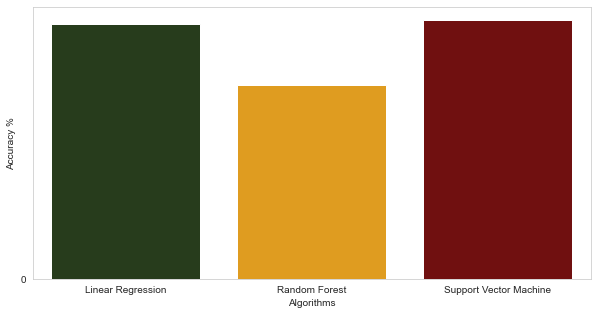

In [20]:
# Comparing Models
accuracies = {}


accuracies['Linear Regression']=accuracy_score(y_test, y_pred_lr)
accuracies['Random Forest']=accuracy_score(y_test, y_pred_rf)
accuracies['Support Vector Machine']=accuracy_score(y_test, y_pred_svm)

colors = ["#254117", "#FFA500", "#800000","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

### **Precentage of Positive, Negative and Neutral Tweets**

In [21]:
positive=bigdata[bigdata['Score']=="Positive"]
print(str(positive.shape[0]/(bigdata.shape[0])*100)+" % of Positive tweets for All Mobile Networks")
pos= positive.shape[0]/bigdata.shape[0]*100

negative=bigdata[bigdata['Score']=="Negative"]
print(str(negative.shape[0]/(bigdata.shape[0])*100)+" % of Negative tweets for All Mobile Networks")
neg= negative.shape[0]/bigdata.shape[0]*100

neutral=bigdata[bigdata['Score']=="Neutral"]
print(str(neutral.shape[0]/(bigdata.shape[0])*100)+" % of Neutral tweets for All Mobile Networks")
nut= neutral.shape[0]/bigdata.shape[0]*100

60.4 % of Positive tweets for All Mobile Networks
20.46153846153846 % of Negative tweets for All Mobile Networks
19.138461538461538 % of Neutral tweets for All Mobile Networks


### **Pie chart for all mobile networks**

Text(0.5, 1.0, 'Sentiment Analysis of All Mobileo Networks')

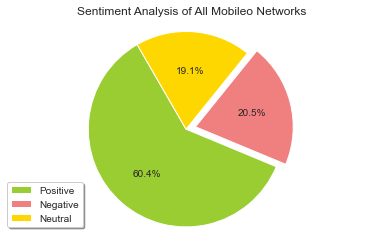

In [22]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=(pos,neg,nut)
colors=['yellowgreen','lightcoral','gold']
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Sentiment_Analysis_Allmobilenetwrks.png")
plt.title("Sentiment Analysis of All Mobile Networks")


Text(0, 0.5, 'Subjectivity')

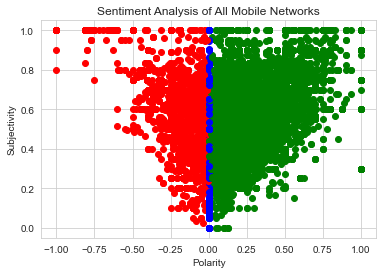

In [23]:
for index,row in bigdata.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
plt.title('Sentiment Analysis of All Mobile Networks')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

## **Bell**

In [25]:
#Bell Data Info
df1 = pd.read_csv('bell_twitterdata.csv')
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    3250 non-null   object
 1   created_at  3250 non-null   object
 2   tweet       3250 non-null   object
dtypes: object(3)
memory usage: 76.3+ KB


In [26]:
# Drop the samples with missing data
df1.dropna(inplace=True)
df1.head()

,username,created_at,tweet
0,Bell_Support,2021-12-13 01:31:20+00:00,@cassimbas Hello there. We are sorry to know t...
1,Bell_Support,2021-12-12 23:45:13+00:00,@dogsareluv We're sorry to know you're having ...
2,Bell_Support,2021-12-12 23:41:27+00:00,@burlingtondude We're sorry to learn about thi...
3,Bell_Support,2021-12-12 22:51:37+00:00,"@blairs1 Thank you for your interest, we would..."
4,Bell_Support,2021-12-12 21:57:53+00:00,@2002Bourgogne We're sorry to know you're havi...


In [27]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt)
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'RT : ','',txt)
    txt = re.sub(r'https?\/\/[A-Za-z0-9\/]+','',txt)
    return txt
df1['Tweet_pre_processed']= df1['tweet'].apply(cleanUpTweet)
df1.sample(6)

,username,created_at,tweet,Tweet_pre_processed
1332,Bell_Support,2021-10-19 03:13:47+00:00,@thastark Hello there. We are sorry to know ab...,Hello there. We are sorry to know about this....
1422,Bell_Support,2021-10-14 16:05:08+00:00,@mcpherson05 Hi! I'm sorry for the trouble tha...,Hi! I'm sorry for the trouble that you're exp...
3154,Bell_Support,2021-07-18 14:25:57+00:00,"@MilanettiJosie On our end, we will do all tha...","On our end, we will do all that we can to hel..."
1289,Bell_Support,2021-10-20 15:00:02+00:00,"@ZAKtalksTECH At this moment, we do not have f...","At this moment, we do not have further detail..."
583,Bell_Support,2021-11-18 13:04:08+00:00,@Wench_66 We're sorry to hear about the experi...,We're sorry to hear about the experience you'...
2359,Bell_Support,2021-09-02 18:19:52+00:00,"@RockyBa18509673 Hi there, we are sorry to hea...","Hi there, we are sorry to hear this and would..."


In [28]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity
df1['Subjectivity']=df1['Tweet_pre_processed'].apply(getTextSubjectivity)
df1['Polarity']=df1['Tweet_pre_processed'].apply(getTextPolarity)
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    
    elif a==0:
        return "Neutral"
    else:
        return "Positive"
df1['Score']=df1['Polarity'].apply(getTextAnalysis)
df1.head(50)

,username,created_at,tweet,Tweet_pre_processed,Subjectivity,Polarity,Score
0,Bell_Support,2021-12-13 01:31:20+00:00,@cassimbas Hello there. We are sorry to know t...,Hello there. We are sorry to know that you're...,0.650000,0.250000,Positive
1,Bell_Support,2021-12-12 23:45:13+00:00,@dogsareluv We're sorry to know you're having ...,"We're sorry to know you're having issues, Col...",0.650000,0.250000,Positive
2,Bell_Support,2021-12-12 23:41:27+00:00,@burlingtondude We're sorry to learn about thi...,We're sorry to learn about this. We'd like to...,1.000000,-0.500000,Negative
3,Bell_Support,2021-12-12 22:51:37+00:00,"@blairs1 Thank you for your interest, we would...","Thank you for your interest, we would like to...",0.000000,0.000000,Neutral
4,Bell_Support,2021-12-12 21:57:53+00:00,@2002Bourgogne We're sorry to know you're havi...,"We're sorry to know you're having issues, Lis...",0.650000,0.250000,Positive
5,Bell_Support,2021-12-12 21:09:21+00:00,@AdabjitB We are sorry to hear that you are ha...,We are sorry to hear that you are having trou...,0.450000,-0.175000,Negative
6,Bell_Support,2021-12-12 20:45:38+00:00,@priprileigh We do recommend that you try rese...,We do recommend that you try resetting the eq...,1.000000,-0.500000,Negative
7,Bell_Support,2021-12-12 20:45:22+00:00,@priprileigh We are sorry to hear that you are...,We are sorry to hear that you are having trou...,0.390000,-0.090000,Negative
8,Bell_Support,2021-12-12 20:23:37+00:00,@eightdeck Thanks for reaching out @eightdeck!...,Thanks for reaching out ! We'd love to work w...,0.464732,0.283631,Positive
9,Bell_Support,2021-12-12 20:14:34+00:00,@CINNEYX Thanks! We will reply very soon. :),Thanks! We will reply very soon. :),0.500000,0.316667,Positive


In [60]:
df1.to_csv('Bell_score.csv', encoding='utf-8', index=False)

In [29]:
positive=df1[df1['Score']=="Positive"]
print(str(positive.shape[0]/(df1.shape[0])*100)+" % of Positive tweets for Bell")
pos= positive.shape[0]/df1.shape[0]*100

negative=df1[df1['Score']=="Negative"]
print(str(negative.shape[0]/(df1.shape[0])*100)+" % of Negative tweets for Bell")
neg= negative.shape[0]/df1.shape[0]*100

neutral=df1[df1['Score']=="Neutral"]
print(str(neutral.shape[0]/(df1.shape[0])*100)+" % of Neutral tweets for Bell")
nut= neutral.shape[0]/df1.shape[0]*100

66.27692307692308 % of Positive tweets for Bell
26.0 % of Negative tweets for Bell
7.723076923076923 % of Neutral tweets for Bell


Text(0.5, 1.0, 'Sentiment Analysis of Bell')

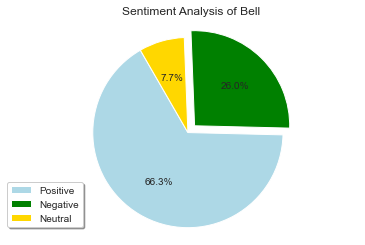

In [30]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=(pos,neg,nut)
colors=['lightblue','green','gold']
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Sentiment_Analysis_Bell.png")
plt.title("Sentiment Analysis of Bell")

Text(0, 0.5, 'Subjectivity')

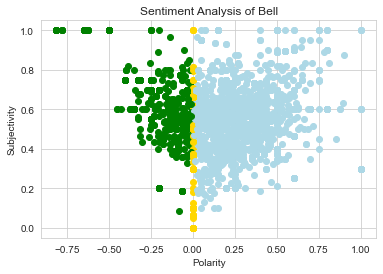

In [31]:
for index,row in df1.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='lightblue')
    elif row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='gold')
plt.title('Sentiment Analysis of Bell')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

## **Rogers**

In [32]:
#Rogers Data Info
df2 = pd.read_csv('rogers_twitterdata.csv')
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    3250 non-null   object
 1   created_at  3250 non-null   object
 2   tweet       3250 non-null   object
dtypes: object(3)
memory usage: 76.3+ KB


In [33]:
# Drop the samples with missing data
df2.dropna(inplace=True)
df2.head()

,username,created_at,tweet
0,RogersHelps,2021-12-13 01:17:22+00:00,"@jeepguycanada Hi there, thanks for bringing t..."
1,RogersHelps,2021-12-13 01:14:14+00:00,@ConsistentFluke Hello there! I'd be looking f...
2,RogersHelps,2021-12-13 01:07:14+00:00,@CarebearAnnon Hello Carolyn! I'd be wonderin...
3,RogersHelps,2021-12-13 00:43:52+00:00,"@AshKash85522459 Hi there, thank you for reach..."
4,RogersHelps,2021-12-13 00:03:50+00:00,"@PMChinEh Hi there, thank you for reaching out..."


In [34]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt)
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'RT : ','',txt)
    txt = re.sub(r'https?\/\/[A-Za-z0-9\/]+','',txt)
    return txt
df2['Tweet_pre_processed']= df2['tweet'].apply(cleanUpTweet)
df2.sample(6)

,username,created_at,tweet,Tweet_pre_processed
3071,RogersHelps,2021-10-13 02:55:46+00:00,@LilMissRed96 That's awesome! :) Enjoy the gam...,That's awesome! :) Enjoy the game! ^ll
2638,RogersHelps,2021-10-19 23:51:58+00:00,@dannie14 We are always looking to expand our ...,We are always looking to expand our services ...
1308,RogersHelps,2021-11-17 01:57:36+00:00,"@cinemaven Hi, it's unfortunate to hear that y...","Hi, it's unfortunate to hear that you are imp..."
801,RogersHelps,2021-11-27 18:42:19+00:00,@ElsieBraytech Good afternoon. Sorry to learn ...,Good afternoon. Sorry to learn you are withou...
1105,RogersHelps,2021-11-20 13:05:54+00:00,"@tarabennett77 Hi, we have replied via DM. *ms","Hi, we have replied via DM. *ms"
2804,RogersHelps,2021-10-17 11:05:14+00:00,@JesseTayVigneux I understand. ^jc,I understand. ^jc


In [35]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity
df2['Subjectivity']=df2['Tweet_pre_processed'].apply(getTextSubjectivity)
df2['Polarity']=df2['Tweet_pre_processed'].apply(getTextPolarity)
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    
    elif a==0:
        return "Neutral"
    else:
        return "Positive"
df2['Score']=df2['Polarity'].apply(getTextAnalysis)
df2.head(50)

,username,created_at,tweet,Tweet_pre_processed,Subjectivity,Polarity,Score
0,RogersHelps,2021-12-13 01:17:22+00:00,"@jeepguycanada Hi there, thanks for bringing t...","Hi there, thanks for bringing this up to our ...",0.350000,0.100000,Positive
1,RogersHelps,2021-12-13 01:14:14+00:00,@ConsistentFluke Hello there! I'd be looking f...,Hello there! I'd be looking for answers as we...,1.000000,1.000000,Positive
2,RogersHelps,2021-12-13 01:07:14+00:00,@CarebearAnnon Hello Carolyn! I'd be wonderin...,Hello Carolyn! I'd be wondering the same if ...,0.562500,0.500000,Positive
3,RogersHelps,2021-12-13 00:43:52+00:00,"@AshKash85522459 Hi there, thank you for reach...","Hi there, thank you for reaching out to us. W...",0.000000,0.000000,Neutral
4,RogersHelps,2021-12-13 00:03:50+00:00,"@PMChinEh Hi there, thank you for reaching out...","Hi there, thank you for reaching out to us ab...",0.535714,0.357143,Positive
5,RogersHelps,2021-12-12 23:07:17+00:00,@robertsullivan_ Glad to hear she was able to ...,"Glad to hear she was able to help, will pass ...",0.812500,0.500000,Positive
6,RogersHelps,2021-12-12 22:55:29+00:00,@RimTassi 24 hours is a long time to be off th...,"24 hours is a long time to be off the grid, w...",0.700000,0.375000,Positive
7,RogersHelps,2021-12-12 22:31:20+00:00,@TimHockey Hi Tim. I don't see an outage for y...,Hi Tim. I don't see an outage for your area a...,0.000000,0.000000,Neutral
8,RogersHelps,2021-12-12 21:05:23+00:00,@almightyaxe Hello Alexander! That's a good qu...,Hello Alexander! That's a good question and d...,0.700000,0.566667,Positive
9,RogersHelps,2021-12-12 21:01:06+00:00,@vik2648 Hello Vik! I'd be anxious to get back...,Hello Vik! I'd be anxious to get back online ...,0.500000,-0.125000,Negative


In [61]:
df2.to_csv('Rogers_score.csv', encoding='utf-8', index=False)

In [36]:
positive=df2[df2['Score']=="Positive"]
print(str(positive.shape[0]/(df2.shape[0])*100)+" % of Positive tweets for Rogers")
pos= positive.shape[0]/df2.shape[0]*100

negative=df2[df2['Score']=="Negative"]
print(str(negative.shape[0]/(df2.shape[0])*100)+" % of Negative tweets for Rogers")
neg= negative.shape[0]/df2.shape[0]*100

neutral=df2[df2['Score']=="Neutral"]
print(str(neutral.shape[0]/(df2.shape[0])*100)+" % of Neutral tweets for Rogers")
nut= neutral.shape[0]/df2.shape[0]*100

60.830769230769235 % of Positive tweets for Rogers
20.584615384615386 % of Negative tweets for Rogers
18.584615384615386 % of Neutral tweets for Rogers


Text(0.5, 1.0, 'Sentiment Analysis of Rogers')

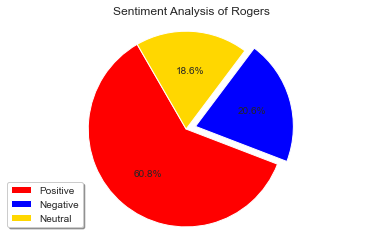

In [37]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=(pos,neg,nut)
colors=['red','blue','gold']
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Sentiment_Analysis_Rogers.png")
plt.title("Sentiment Analysis of Rogers")

Text(0, 0.5, 'Subjectivity')

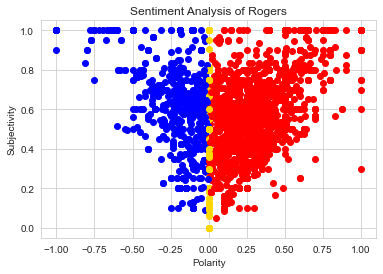

In [38]:
for index,row in df2.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
    elif row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='gold')
plt.title('Sentiment Analysis of Rogers')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

## **Telus**

In [39]:
#Telus Data Info
df3 = pd.read_csv('telus_twiiterdata.csv')
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    3250 non-null   object
 1   created_at  3250 non-null   object
 2   tweet       3250 non-null   object
dtypes: object(3)
memory usage: 76.3+ KB


In [40]:
# Drop the samples with missing data
df3.dropna(inplace=True)
df3.head()

,username,created_at,tweet
0,TELUSsupport,2021-12-12 20:00:03+00:00,The holidays are almost here! We hope you and ...
1,TELUSsupport,2021-12-12 19:38:28+00:00,@Ma_tthewRivera Hello! If you still need assis...
2,TELUSsupport,2021-12-12 19:17:10+00:00,@ShawnKing Once a payment investigation is ope...
3,TELUSsupport,2021-12-12 15:43:47+00:00,"@ShawnKing I see, if you wish to discuss this ..."
4,TELUSsupport,2021-12-12 15:03:47+00:00,@RuthLin48053874 No worries! Sorry about the i...


In [41]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt)
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'RT : ','',txt)
    txt = re.sub(r'https?\/\/[A-Za-z0-9\/]+','',txt)
    return txt
df3['Tweet_pre_processed']= df3['tweet'].apply(cleanUpTweet)
df3.sample(6)

,username,created_at,tweet,Tweet_pre_processed
1807,TELUSsupport,2021-10-06 19:34:15+00:00,"@banjosworld Hey Paul, we responded to your DM.","Hey Paul, we responded to your DM."
773,TELUSsupport,2021-11-11 20:21:47+00:00,@Barb_Here Hey Barb! Are you still experiencin...,Hey Barb! Are you still experiencing the issu...
818,TELUSsupport,2021-11-10 11:24:40+00:00,"@KillerQueen_77 Hi Jessica, we don't have anyt...","Hi Jessica, we don't have anything reported y..."
2536,TELUSsupport,2021-09-14 14:10:16+00:00,@J053485693 Our residential technicians unfort...,Our residential technicians unfortunately can...
584,TELUSsupport,2021-11-19 08:09:06+00:00,"@ZakMcLachlan Hi there, Zak. We're sorry about...","Hi there, Zak. We're sorry about this. Please..."
2539,TELUSsupport,2021-09-14 13:10:46+00:00,@Surtock Hi Mark! Sorry for the late response....,Hi Mark! Sorry for the late response. We can ...


In [42]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity
df3['Subjectivity']=df3['Tweet_pre_processed'].apply(getTextSubjectivity)
df3['Polarity']=df3['Tweet_pre_processed'].apply(getTextPolarity)
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    
    elif a==0:
        return "Neutral"
    else:
        return "Positive"
df3['Score']=df3['Polarity'].apply(getTextAnalysis)
df3.head(50)

,username,created_at,tweet,Tweet_pre_processed,Subjectivity,Polarity,Score
0,TELUSsupport,2021-12-12 20:00:03+00:00,The holidays are almost here! We hope you and ...,The holidays are almost here! We hope you and ...,0.300000,0.150000,Positive
1,TELUSsupport,2021-12-12 19:38:28+00:00,@Ma_tthewRivera Hello! If you still need assis...,Hello! If you still need assistance with this...,0.000000,0.000000,Neutral
2,TELUSsupport,2021-12-12 19:17:10+00:00,@ShawnKing Once a payment investigation is ope...,"Once a payment investigation is open, my coll...",0.500000,0.000000,Neutral
3,TELUSsupport,2021-12-12 15:43:47+00:00,"@ShawnKing I see, if you wish to discuss this ...","I see, if you wish to discuss this further, f...",0.650000,0.200000,Positive
4,TELUSsupport,2021-12-12 15:03:47+00:00,@RuthLin48053874 No worries! Sorry about the i...,No worries! Sorry about the inconvenience of ...,1.000000,-0.625000,Negative
5,TELUSsupport,2021-12-12 14:35:24+00:00,@CURTMAH We're sorry to see that. Please feel ...,We're sorry to see that. Please feel free to ...,0.766667,-0.033333,Negative
6,TELUSsupport,2021-12-12 14:29:06+00:00,@Eyespyaniceass Hello Thumper! Please feel fre...,Hello Thumper! Please feel free to DM us if y...,0.650000,0.200000,Positive
7,TELUSsupport,2021-12-12 14:09:33+00:00,@ShawnKing Hi Shawn! \n\nSorry to hear about t...,Hi Shawn! \n\nSorry to hear about this experi...,1.000000,-0.500000,Negative
8,TELUSsupport,2021-12-12 14:06:17+00:00,@Lightskinduude Hello Jordyn! Please feel free...,Hello Jordyn! Please feel free to send us a D...,0.800000,0.400000,Positive
9,TELUSsupport,2021-12-11 23:10:03+00:00,@RJ_PictureThat Sorry to see that! We're here ...,Sorry to see that! We're here for you as well.,1.000000,-0.625000,Negative


In [62]:
df3.to_csv('Telus_score.csv', encoding='utf-8', index=False)

In [43]:
positive=df3[df3['Score']=="Positive"]
print(str(positive.shape[0]/(df3.shape[0])*100)+" % of Positive tweets for Telus")
pos= positive.shape[0]/df3.shape[0]*100

negative=df3[df3['Score']=="Negative"]
print(str(negative.shape[0]/(df3.shape[0])*100)+" % of Negative tweets for Telus")
neg= negative.shape[0]/df3.shape[0]*100

neutral=df3[df3['Score']=="Neutral"]
print(str(neutral.shape[0]/(df3.shape[0])*100)+" % of Neutral tweets for Telus")
nut= neutral.shape[0]/df3.shape[0]*100

47.753846153846155 % of Positive tweets for Telus
23.63076923076923 % of Negative tweets for Telus
28.615384615384613 % of Neutral tweets for Telus


Text(0.5, 1.0, 'Sentiment Analysis of Telus')

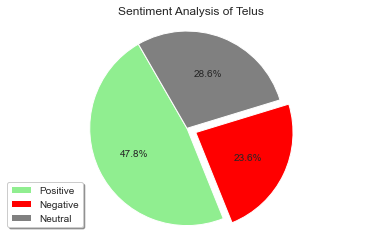

In [44]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=(pos,neg,nut)
colors=['lightgreen','red','gray']
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Sentiment_Analysis_Telus.png")
plt.title("Sentiment Analysis of Telus")

Text(0, 0.5, 'Subjectivity')

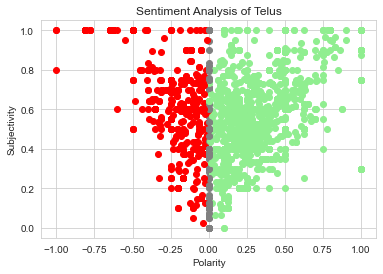

In [45]:
for index,row in df3.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='lightgreen')
    elif row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='gray')
plt.title('Sentiment Analysis of Telus')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

## **Freedom**

In [46]:
#Freedom Data Info
df4 = pd.read_csv('freedom_twitterdata.csv')
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    3250 non-null   object
 1   created_at  3250 non-null   object
 2   tweet       3250 non-null   object
dtypes: object(3)
memory usage: 76.3+ KB


In [47]:
# Drop the samples with missing data
df4.dropna(inplace=True)
df4.head()

,username,created_at,tweet
0,freedomsupport,2021-12-12 19:57:56+00:00,"@OCT_Fan Hey Michael, we certainly do! Feel fr..."
1,freedomsupport,2021-12-12 16:44:22+00:00,@justinbonter We totally understand the frustr...
2,freedomsupport,2021-12-12 15:33:14+00:00,"@BennyBlanq Hey Benny, that sounds like a very..."
3,freedomsupport,2021-12-12 14:00:29+00:00,Do you have any questions about your bill? You...
4,freedomsupport,2021-12-12 06:00:27+00:00,Turns out drinking only eggnog is bad for you....


In [48]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','',txt)
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'RT : ','',txt)
    txt = re.sub(r'https?\/\/[A-Za-z0-9\/]+','',txt)
    return txt
df4['Tweet_pre_processed']= df3['tweet'].apply(cleanUpTweet)
df4.sample(6)

,username,created_at,tweet,Tweet_pre_processed
1621,freedomsupport,2021-08-21 04:12:40+00:00,"@Swagger4587 Hi, thank's for reaching out, If ...",Hi there- We're sorry to hear this. We recomm...
297,freedomsupport,2021-11-24 22:34:37+00:00,@BoringLisaP Hey there! We would love to have ...,Hello Kirk! :) Did you try to call control fe...
1969,freedomsupport,2021-07-24 13:00:20+00:00,We hope everyone gets to enjoy that sunshine t...,"Gotcha. Facebook, Instagram, and Whatsapp are..."
61,freedomsupport,2021-12-08 20:43:41+00:00,@nltightlines Some of them are pretty fun! Als...,Hi there! \n\nAccording to our TELUS Service ...
439,freedomsupport,2021-11-14 04:34:19+00:00,"@Bajaj_47 Hi, could you send us a DM? -A.P htt...","We'd be sad to see you go. If you reconsider,..."
462,freedomsupport,2021-11-10 17:18:01+00:00,"@Gia_Rose_ Hello, if you can send us a DM we c...",Please feel free to send us a direct message ...


In [49]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity
df4['Subjectivity']=df4['Tweet_pre_processed'].apply(getTextSubjectivity)
df4['Polarity']=df4['Tweet_pre_processed'].apply(getTextPolarity)
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    
    elif a==0:
        return "Neutral"
    else:
        return "Positive"
df4['Score']=df4['Polarity'].apply(getTextAnalysis)
df4.head(50)

,username,created_at,tweet,Tweet_pre_processed,Subjectivity,Polarity,Score
0,freedomsupport,2021-12-12 19:57:56+00:00,"@OCT_Fan Hey Michael, we certainly do! Feel fr...",The holidays are almost here! We hope you and ...,0.300000,0.150000,Positive
1,freedomsupport,2021-12-12 16:44:22+00:00,@justinbonter We totally understand the frustr...,Hello! If you still need assistance with this...,0.000000,0.000000,Neutral
2,freedomsupport,2021-12-12 15:33:14+00:00,"@BennyBlanq Hey Benny, that sounds like a very...","Once a payment investigation is open, my coll...",0.500000,0.000000,Neutral
3,freedomsupport,2021-12-12 14:00:29+00:00,Do you have any questions about your bill? You...,"I see, if you wish to discuss this further, f...",0.650000,0.200000,Positive
4,freedomsupport,2021-12-12 06:00:27+00:00,Turns out drinking only eggnog is bad for you....,No worries! Sorry about the inconvenience of ...,1.000000,-0.625000,Negative
5,freedomsupport,2021-12-12 05:52:46+00:00,@MartijnKoldijk The $50/mo pricing you're seei...,We're sorry to see that. Please feel free to ...,0.766667,-0.033333,Negative
6,freedomsupport,2021-12-12 02:48:13+00:00,@Mr1Nice_Guy No problem! -A.P,Hello Thumper! Please feel free to DM us if y...,0.650000,0.200000,Positive
7,freedomsupport,2021-12-12 02:41:09+00:00,@Mr1Nice_Guy You'll want to make sure it cover...,Hi Shawn! \n\nSorry to hear about this experi...,1.000000,-0.500000,Negative
8,freedomsupport,2021-12-12 02:26:18+00:00,"@Mr1Nice_Guy Ok, sounds good, we don't have an...",Hello Jordyn! Please feel free to send us a D...,0.800000,0.400000,Positive
9,freedomsupport,2021-12-12 02:07:55+00:00,"@my_v3nting_page Hi there, thanks for reaching...",Sorry to see that! We're here for you as well.,1.000000,-0.625000,Negative


In [63]:
df4.to_csv('Freedom_score.csv', encoding='utf-8', index=False)

In [50]:
positive=df4[df4['Score']=="Positive"]
print(str(positive.shape[0]/(df4.shape[0])*100)+" % of Positive tweets for Freedom")
pos= positive.shape[0]/df4.shape[0]*100

negative=df4[df4['Score']=="Negative"]
print(str(negative.shape[0]/(df4.shape[0])*100)+" % of Negative tweets for Freedom")
neg= negative.shape[0]/df4.shape[0]*100

neutral=df4[df4['Score']=="Neutral"]
print(str(neutral.shape[0]/(df4.shape[0])*100)+" % of Neutral tweets for Freedom")
nut= neutral.shape[0]/df4.shape[0]*100

47.753846153846155 % of Positive tweets for Freedom
23.63076923076923 % of Negative tweets for Freedom
28.615384615384613 % of Neutral tweets for Freedom


Text(0.5, 1.0, 'Sentiment Analysis of Freedom')

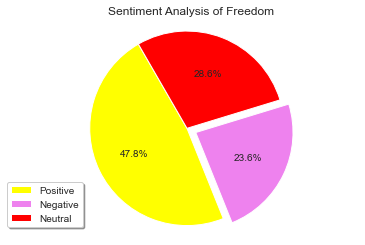

In [51]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=(pos,neg,nut)
colors=['yellow','violet','red']
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Sentiment_Analysis_Freedom.png")
plt.title("Sentiment Analysis of Freedom")

Text(0, 0.5, 'Subjectivity')

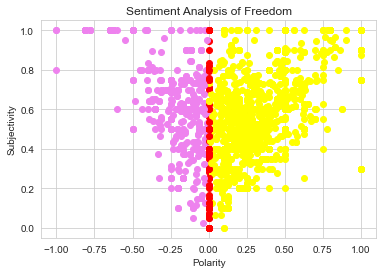

In [52]:
for index,row in df3.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='yellow')
    elif row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='violet')
    elif row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
plt.title('Sentiment Analysis of Freedom')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

## **Comparision of all Network**


## **Using Neural Network**

In [598]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [599]:
data=pd.read_csv('dataset.csv', engine ='python')
data.columns=["Score","time","date","query","username","tweet"]

Five top records of data

In [600]:
data.head()

,Score,time,date,query,username,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Five last records of data

In [601]:
data.tail()

,Score,time,date,query,username,tweet
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [602]:
#score = {'Positive': 1,'Negative': 0,'Neutral':0}
  
# traversing through dataframe
# Gender column and writing
# values where key matches
#data.Score = [score[item] for item in data.Score]
#print(data)

In [603]:
data.head()

,Score,time,date,query,username,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [604]:
print("length of data is ",len(data))

length of data is  1599999


In [605]:
data.shape

(1599999, 6)

In [606]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Score     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   tweet     1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [607]:
data.dtypes

Score        int64
time         int64
date        object
query       object
username    object
tweet       object
dtype: object

In [608]:
np.sum(data.isnull().any(axis=1))

0

## **Data Prepration**

In [609]:
data=data[['Score','tweet']]

In [610]:
data['Score'][data['Score']==4]=1

In [611]:
data_pos=data[data['Score']==1]
#data_neg=data[data['Score']==-1]
data_neg=data[data['Score']==0]

In [612]:
data_pos=data_pos.iloc[:int(2000)]
data_neg=data_neg.iloc[:int(2000)]
#data_neu=data_neu.iloc[:int(2000)]

In [613]:
data=pd.concat([data_pos,data_neg,data_neu])

In [614]:
data['tweet']=data['tweet'].str.lower()

## **Cleaning the data**

In [615]:
stopwords_list=stopwords.words('english')

In [616]:
from nltk.corpus import stopwords
",".join(stopwords.words('english'))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [617]:
STOPWORDS=set(stopwords.words('english'))
def cleaning_stopwords(tweet):
    return" ".join([word for word in str(tweet).split() if word not in STOPWORDS])
data['tweet']=data['tweet'].apply(lambda tweet: cleaning_stopwords(tweet))
data['tweet'].head()

799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: tweet, dtype: object

In [618]:
english_punctuations= string.punctuation
punctuations_list= english_punctuations
def cleaning_punctuations(tweet):
    translator=str.maketrans('','',punctuations_list)
    return tweet.translate(translator)

In [619]:
data['tweet']=data['tweet'].apply(lambda x: cleaning_punctuations(x))
data['tweet'].tail()

799994    sick spending day laying bed listening taylors...
799995                                           gmail down
799996                                rest peace farrah sad
799997    ericurbane sounds like rival flagging ads much...
799998    resit exams summer wishes worked harder first ...
Name: tweet, dtype: object

In [620]:
def cleaning_repeating_char(tweet):
    return re.sub(r'(.)\1+',r'\1',tweet)
    

In [621]:
data['tweet']=data['tweet'].apply(lambda x: cleaning_repeating_char(x))
data['tweet'].tail()

799994    sick spending day laying bed listening taylors...
799995                                           gmail down
799996                                 rest peace farah sad
799997    ericurbane sounds like rival flaging ads much ...
799998    resit exams sumer wishes worked harder first y...
Name: tweet, dtype: object

In [622]:
def cleaning_url(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',data)

In [623]:
data['tweet']=data['tweet'].apply(lambda x: cleaning_url(x))
data['tweet'].tail()

799994    sick spending day laying bed listening taylors...
799995                                           gmail down
799996                                 rest peace farah sad
799997    ericurbane sounds like rival flaging ads much ...
799998    resit exams sumer wishes worked harder first y...
Name: tweet, dtype: object

In [624]:
def cleaning_email(data):
    return re.sub('@[^\s]+','',data)

In [625]:
data['tweet']=data['tweet'].apply(lambda x: cleaning_email(x))
data['tweet'].tail()

799994    sick spending day laying bed listening taylors...
799995                                           gmail down
799996                                 rest peace farah sad
799997    ericurbane sounds like rival flaging ads much ...
799998    resit exams sumer wishes worked harder first y...
Name: tweet, dtype: object

In [626]:
def cleaning_numbers(data):
    return re.sub('[0-9]+','',data)

In [627]:
data['tweet']=data['tweet'].apply(lambda x: cleaning_numbers(x))
data['tweet'].tail()

799994    sick spending day laying bed listening taylors...
799995                                           gmail down
799996                                 rest peace farah sad
799997    ericurbane sounds like rival flaging ads much ...
799998    resit exams sumer wishes worked harder first y...
Name: tweet, dtype: object

In [628]:
tokenizer=RegexpTokenizer(r'\w+')
data['tweet']=data['tweet'].apply(tokenizer.tokenize)

In [629]:
data['tweet'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: tweet, dtype: object

## **Applying Lematizer**

In [630]:
lm=nltk.WordNetLemmatizer()
def lematizer_on_text(data):
    text=[lm.lemmatize(word) for word in data]
    return data
data['tweet']=data['tweet'].apply(lambda x: lematizer_on_text(x))

In [631]:
data['tweet'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: tweet, dtype: object

## **Applying Stemming**

In [632]:
st=nltk.PorterStemmer()
def stemming_on_text(data):
    text=[st.stem(word) for word in data]
    return data
data['tweet']=data['tweet'].apply(lambda x: stemming_on_text(x))

KeyboardInterrupt: 

In [ ]:
data['tweet'].head()

## **Labels**

In [ ]:
x=data.tweet
y=data.Score

**Preparing the input features for training**

In [ ]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(x)
sequences = tok.texts_to_sequences(x)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

**Model compilation**

In [342]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

In [343]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

**Training and validating with parameter tuning**

In [345]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
6332/6332 [==============================] - 2537s 400ms/step - loss: 0.0192 - accuracy: 0.9974 - val_loss: 0.0208 - val_accuracy: 0.9975
Epoch 2/6
6332/6332 [==============================] - 2728s 431ms/step - loss: 0.0198 - accuracy: 0.9975 - val_loss: 0.0210 - val_accuracy: 0.9975
Epoch 3/6
6332/6332 [==============================] - 2493s 394ms/step - loss: 0.0219 - accuracy: 0.9975 - val_loss: 0.0224 - val_accuracy: 0.9975
Epoch 4/6
6332/6332 [==============================] - 2455s 388ms/step - loss: 0.0229 - accuracy: 0.9975 - val_loss: 0.0249 - val_accuracy: 0.9975
Epoch 5/6
6332/6332 [==============================] - 2944s 465ms/step - loss: 0.0228 - accuracy: 0.9975 - val_loss: 0.0184 - val_accuracy: 0.9975
Epoch 6/6
6332/6332 [==============================] - 3060s 483ms/step - loss: 0.0233 - accuracy: 0.9975 - val_loss: 0.0204 - val_accuracy: 0.9975
Training finished !!


In [ ]:
accr1 = model.evaluate(X_test,Y_test)

**Saving the model**

In [590]:
!mkdir -p saved_model
model.save('saved_model/my_model')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [633]:
from tensorflow import keras
model = keras.models.load_model('saved_model/my_model')

In [634]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 500)]             0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 500, 50)           100000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

**Testing the model on all mobile network data**

In [635]:
sent=pd.read_csv('All_network_data_score.csv', engine ='python')


In [636]:
sent

,username,created_at,tweet,Tweet_pre_processed,Subjectivity,Polarity,Score
0,Bell_Support,2021-12-13 01:31:20+00:00,@cassimbas Hello there. We are sorry to know t...,Hello there. We are sorry to know that you're...,0.650000,0.250000,Positive
1,Bell_Support,2021-12-12 23:45:13+00:00,@dogsareluv We're sorry to know you're having ...,"We're sorry to know you're having issues, Col...",0.650000,0.250000,Positive
2,Bell_Support,2021-12-12 23:41:27+00:00,@burlingtondude We're sorry to learn about thi...,We're sorry to learn about this. We'd like to...,1.000000,-0.500000,Negative
3,Bell_Support,2021-12-12 22:51:37+00:00,"@blairs1 Thank you for your interest, we would...","Thank you for your interest, we would like to...",0.000000,0.000000,Neutral
4,Bell_Support,2021-12-12 21:57:53+00:00,@2002Bourgogne We're sorry to know you're havi...,"We're sorry to know you're having issues, Lis...",0.650000,0.250000,Positive
...,...,...,...,...,...,...,...
12995,freedomsupport,2021-03-27 16:54:03+00:00,"@franciscabyc Wow, this is beautiful! ðŸ˜®ðŸ§¡...","Wow, this is beautiful! ðŸ˜®ðŸ§¡ -K.T",1.000000,0.550000,Positive
12996,freedomsupport,2021-03-27 16:34:16+00:00,@mmcksmith We'll need to verify you and look i...,We'll need to verify you and look into your a...,0.541667,0.166667,Positive
12997,freedomsupport,2021-03-27 16:13:11+00:00,"@mmcksmith Hi Megan, we'd definitely like to l...","Hi Megan, we'd definitely like to look this o...",0.562500,0.250000,Positive
12998,freedomsupport,2021-03-27 15:38:55+00:00,"@ganjaginga Hi, we'd definitely like to look l...","Hi, we'd definitely like to look look into an...",0.700000,0.400000,Positive


In [637]:
sent.drop(['username','created_at','tweet','Subjectivity','Polarity'], axis=1, inplace=True)

In [638]:
sent

,Tweet_pre_processed,Score
0,Hello there. We are sorry to know that you're...,Positive
1,"We're sorry to know you're having issues, Col...",Positive
2,We're sorry to learn about this. We'd like to...,Negative
3,"Thank you for your interest, we would like to...",Neutral
4,"We're sorry to know you're having issues, Lis...",Positive
...,...,...
12995,"Wow, this is beautiful! ðŸ˜®ðŸ§¡ -K.T",Positive
12996,We'll need to verify you and look into your a...,Positive
12997,"Hi Megan, we'd definitely like to look this o...",Positive
12998,"Hi, we'd definitely like to look look into an...",Positive


In [639]:
sent.Score[sent.Score == 'Positive'] = 1
sent.Score[sent.Score == 'Negative'] = 0
sent.Score[sent.Score == 'Neutral'] = -1
print(sent)

                                     Tweet_pre_processed Score
0       Hello there. We are sorry to know that you're...     1
1       We're sorry to know you're having issues, Col...     1
2       We're sorry to learn about this. We'd like to...     0
3       Thank you for your interest, we would like to...    -1
4       We're sorry to know you're having issues, Lis...     1
...                                                  ...   ...
12995              Wow, this is beautiful! ðŸ˜®ðŸ§¡ -K.T     1
12996   We'll need to verify you and look into your a...     1
12997   Hi Megan, we'd definitely like to look this o...     1
12998   Hi, we'd definitely like to look look into an...     1
12999   Hi there, Andy. Please send us a DM and we'd ...     1

[13000 rows x 2 columns]


In [640]:
sent["Score"] = sent["Score"].astype(str).astype(int)

In [641]:
sent_pos=sent[sent['Score']==1]
sent_nug=data[data['Score']==-1]
sent_neg=sent[sent['Score']==0]

In [642]:
sent_pos=sent_pos.iloc[:int(2000)]
sent_neg=sent_neg.iloc[:int(2000)]
sent_nug=sent_neg.iloc[:int(2000)]

In [643]:
sent=pd.concat([sent_pos,sent_neg,sent_nug])

In [644]:
sent['Tweet_pre_processed']=sent['Tweet_pre_processed'].str.lower()

In [645]:
stopwords_list=stopwords.words('english')

In [646]:
from nltk.corpus import stopwords
",".join(stopwords.words('english'))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [647]:
STOPWORDS=set(stopwords.words('english'))
def cleaning_stopwords(tweet):
    return" ".join([word for word in str(tweet).split() if word not in STOPWORDS])
sent['Tweet_pre_processed']=sent['Tweet_pre_processed'].apply(lambda tweet: cleaning_stopwords(tweet))
sent['Tweet_pre_processed'].head()

0    hello there. sorry know issues internet speed....
1    we're sorry know issues, collete. please dm us...
4    we're sorry know issues, lisa. outage posted a...
8    thanks reaching ! we'd love work you. simply c...
9                               thanks! reply soon. :)
Name: Tweet_pre_processed, dtype: object

In [648]:
english_punctuations= string.punctuation
punctuations_list= english_punctuations
def cleaning_punctuations(tweet):
    translator=str.maketrans('','',punctuations_list)
    return tweet.translate(translator)

In [649]:
sent['Tweet_pre_processed']=sent['Tweet_pre_processed'].apply(lambda x: cleaning_punctuations(x))
sent['Tweet_pre_processed'].tail()

8549    received text within minutes something may wro...
8557    hi erin sorry hear issues new ios update tried...
8563    hi rob were sorry hear this please visit https...
8564    hi megan thanks contacting us were really sorr...
8565    hi aditya please report issue  httpstcocl4v3po...
Name: Tweet_pre_processed, dtype: object

In [650]:
def cleaning_repeating_char(tweet):
    return re.sub(r'(.)\1+',r'\1',tweet)
    

In [651]:
sent['Tweet_pre_processed']=sent['Tweet_pre_processed'].apply(lambda x: cleaning_repeating_char(x))
sent['Tweet_pre_processed'].tail()

8549    received text within minutes something may wro...
8557    hi erin sory hear isues new ios update tried r...
8563    hi rob were sory hear this please visit htpstc...
8564    hi megan thanks contacting us were realy sory ...
8565    hi aditya please report isue htpstcocl4v3poh3m...
Name: Tweet_pre_processed, dtype: object

In [652]:
def cleaning_url(sent):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',sent)

In [653]:
sent['Tweet_pre_processed']=sent['Tweet_pre_processed'].apply(lambda x: cleaning_url(x))
sent['Tweet_pre_processed'].tail()

8549    received text within minutes something may wro...
8557    hi erin sory hear isues new ios update tried r...
8563    hi rob were sory hear this please visit htpstc...
8564    hi megan thanks contacting us were realy sory ...
8565    hi aditya please report isue htpstcocl4v3poh3m...
Name: Tweet_pre_processed, dtype: object

In [654]:
def cleaning_email(sent):
    return re.sub('@[^\s]+','',sent)

In [655]:
sent['Tweet_pre_processed']=sent['Tweet_pre_processed'].apply(lambda x: cleaning_email(x))
sent['Tweet_pre_processed'].tail()

8549    received text within minutes something may wro...
8557    hi erin sory hear isues new ios update tried r...
8563    hi rob were sory hear this please visit htpstc...
8564    hi megan thanks contacting us were realy sory ...
8565    hi aditya please report isue htpstcocl4v3poh3m...
Name: Tweet_pre_processed, dtype: object

In [656]:
def cleaning_numbers(sent):
    return re.sub('[0-9]+','',sent)

In [657]:
sent['Tweet_pre_processed']=sent['Tweet_pre_processed'].apply(lambda x: cleaning_numbers(x))
sent['Tweet_pre_processed'].tail()

8549    received text within minutes something may wro...
8557    hi erin sory hear isues new ios update tried r...
8563    hi rob were sory hear this please visit htpstc...
8564    hi megan thanks contacting us were realy sory ...
8565    hi aditya please report isue htpstcoclvpohm us...
Name: Tweet_pre_processed, dtype: object

In [658]:
tokenizer=RegexpTokenizer(r'\w+')
sent['Tweet_pre_processed']=sent['Tweet_pre_processed'].apply(tokenizer.tokenize)

In [659]:
sent['Tweet_pre_processed'].head()

0    [helo, there, sory, know, isues, internet, spe...
1    [were, sory, know, isues, colete, please, dm, ...
4    [were, sory, know, isues, lisa, outage, posted...
8    [thanks, reaching, wed, love, work, you, simpl...
9                                 [thanks, reply, son]
Name: Tweet_pre_processed, dtype: object

In [660]:
lm=nltk.WordNetLemmatizer()
def lematizer_on_text(sent):
    text=[lm.lemmatize(word) for word in sent]
    return sent
sent['Tweet_pre_processed']=sent['Tweet_pre_processed'].apply(lambda x: lematizer_on_text(x))

In [661]:
st=nltk.PorterStemmer()
def stemming_on_text(sent):
    text=[st.stem(word) for word in sent]
    return sent
sent['Tweet_pre_processed']=sent['Tweet_pre_processed'].apply(lambda x: stemming_on_text(x))

In [662]:
sent['Tweet_pre_processed'].head()

0    [helo, there, sory, know, isues, internet, spe...
1    [were, sory, know, isues, colete, please, dm, ...
4    [were, sory, know, isues, lisa, outage, posted...
8    [thanks, reaching, wed, love, work, you, simpl...
9                                 [thanks, reply, son]
Name: Tweet_pre_processed, dtype: object

In [663]:
sent.dtypes

Tweet_pre_processed    object
Score                   int32
dtype: object

In [664]:
x1=sent.Tweet_pre_processed
y1=sent.Score

In [665]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(x1)
sequences = tok.texts_to_sequences(x1)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [666]:
X_train, x_test, Y_train, y_test = train_test_split(sequences_matrix, y1, test_size=0.3, random_state=2)

In [578]:
accr1 = model.evaluate(x_test,y_test)

57/57 [==============================] - 3s 50ms/step - loss: 4.5416 - accuracy: 0.6572


In [589]:
print('Test set\n Accuracy: {:0.2f}'.format(accr1[1]))

Test set
 Accuracy: 0.66


In [518]:
df1 = pd.read_csv('Bell_score.csv')
df2 = pd.read_csv('Rogers_score.csv')
df3 = pd.read_csv('Telus_score.csv')
df4 = pd.read_csv('Freedom_score.csv')

In [520]:
positive=df1[df1['Score']=="Positive"]
posbell= positive.shape[0]/df1.shape[0]*100
positive=df2[df2['Score']=="Positive"]
posrogers= positive.shape[0]/df2.shape[0]*100
positive=df3[df3['Score']=="Positive"]
postelus= positive.shape[0]/df3.shape[0]*100
positive=df4[df4['Score']=="Positive"]
posfreedom= positive.shape[0]/df4.shape[0]*100

In [521]:
negative=df1[df1['Score']=="Negative"]
negbell= negative.shape[0]/df1.shape[0]*100
negative=df2[df2['Score']=="Negative"]
negrogers= negative.shape[0]/df2.shape[0]*100
negative=df3[df3['Score']=="Negative"]
negtelus= negative.shape[0]/df3.shape[0]*100
negative=df4[df4['Score']=="Negative"]
negfreedom= negative.shape[0]/df4.shape[0]*100

In [522]:
neutral=df1[df1['Score']=="Neutral"]
nugbell= neutral.shape[0]/df1.shape[0]*100
neutral=df2[df2['Score']=="Neutral"]
nugrogers= neutral.shape[0]/df2.shape[0]*100
neutral=df3[df3['Score']=="Neutral"]
nugtelus= neutral.shape[0]/df3.shape[0]*100
neutral=df4[df4['Score']=="Neutral"]
nugfreedom= neutral.shape[0]/df4.shape[0]*100

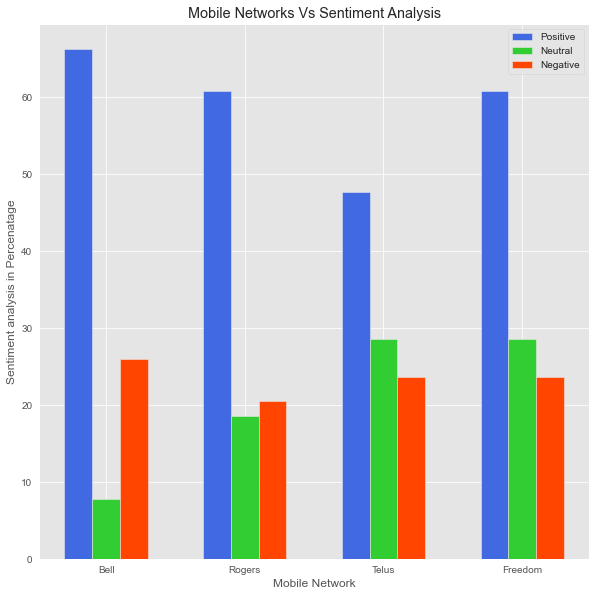

In [523]:
import matplotlib.pyplot as plt
   
Mobile_networks = ['Bell','Rogers','Telus','Freedom']
positive_sentiments = [posbell,posrogers,postelus,posrogers]
negative_sentiments = [negbell,negrogers,negtelus,negfreedom]
neutral_sentiments = [nugbell,nugrogers,nugtelus,nugfreedom]
X_axis = np.arange(len(Mobile_networks))
def cm_to_inch(value):
    return value/2.54
plt.figure(figsize=(cm_to_inch(25), cm_to_inch(25)))
bar1=plt.bar(X_axis + 0, positive_sentiments, 0.2, label = 'Postive',color='royalblue')
bar2=plt.bar(X_axis + 0.2, neutral_sentiments, 0.2, label = 'Neutral',color='limegreen')
bar3=plt.bar(X_axis + 0.4, negative_sentiments, 0.2, label = 'Negative',color='orangered')


New_Colors = ['blue','red','green','yellow']
plt.legend( (bar1, bar2, bar3), ('Positive', 'Neutral', 'Negative') )
plt.xticks(X_axis+0.2, Mobile_networks)
plt.title('Mobile Networks Vs Sentiment Analysis')
plt.xlabel('Mobile Network')
plt.ylabel('Sentiment analysis in Percenatage')
plt.show()

Text(0.5, 1.0, 'Positive Sentiment Analysis of All Mobile Network')

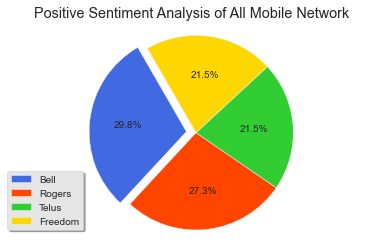

In [524]:
explode=(0.1,0,0,0)
labels='Bell','Rogers','Telus','Freedom'
sizes=(posbell,posrogers,postelus,posfreedom)
colors=['royalblue','orangered','limegreen','gold']
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')

plt.title("Positive Sentiment Analysis of All Mobile Network")

In [667]:
model.predict(x_test)

array([[2.7033543e-06],
       [3.1400518e-06],
       [4.1824792e-06],
       ...,
       [1.4413784e-07],
       [5.4457814e-06],
       [6.9249768e-06]], dtype=float32)

In [668]:
predicted_output=model.predict(x_test)

In [677]:
np.amax(predicted_output)

0.0042895973